In [1]:
with open ("bible.txt", "r") as myfile:
    bible = myfile.readlines()

In [2]:
bible[0]

'Genesis 1:1\tIn the beginning God created the heaven and the earth.\n'

In [3]:
type(bible)

list

In [4]:
import pandas as pd

In [5]:
bible = list(map(lambda x: str(x).split('\t'), bible))

In [6]:
df_bible = pd.DataFrame(list(bible))

In [7]:
df_bible.columns = ['Verse', 'Text']

In [8]:
df_bible['Text'] = df_bible['Text'].apply(lambda x: x.rstrip('\n'))

In [9]:
df_bible.tail()

,Verse,Text
31097,Revelation 22:17,"And the Spirit and the bride say, Come. And le..."
31098,Revelation 22:18,For I testify unto every man that heareth the ...
31099,Revelation 22:19,And if any man shall take away from the words ...
31100,Revelation 22:20,"He which testifieth these things saith, Surely..."
31101,Revelation 22:21,The grace of our Lord Jesus Christ be with you...


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
len_verse = df_bible['Text'].apply(lambda x:len(x))

In [13]:
len_verse.head()

0     54
1    142
2     54
3     85
4    115
Name: Text, dtype: int64

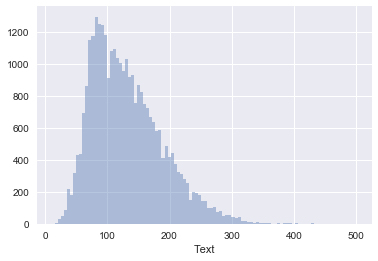

In [14]:
sns.distplot(len_verse, bins=100,kde=False)

In [15]:
df_bible['Text'].head()

0    In the beginning God created the heaven and th...
1    And the earth was without form, and void; and ...
2    And God said, Let there be light: and there wa...
3    And God saw the light, that it was good: and G...
4    And God called the light Day, and the darkness...
Name: Text, dtype: object

In [16]:
df_bible['Just letters'] = df_bible['Text'].apply(lambda string: ''.join(e for e in string if e.isalnum()))

In [17]:
df_bible['Just letters'].loc[0]

'InthebeginningGodcreatedtheheavenandtheearth'

In [18]:
df_bible['Len Letters'] = df_bible['Just letters'].apply(lambda x:len(x))

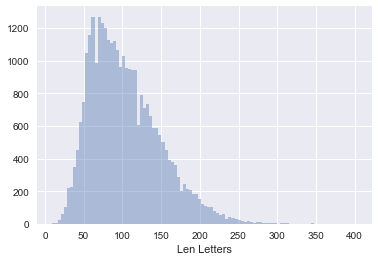

In [19]:
sns.distplot(df_bible['Len Letters'],kde=False, bins=100)

In [20]:
df_bible['Len Letters'].value_counts().head()

65    349
66    345
71    341
64    335
63    330
Name: Len Letters, dtype: int64

In [21]:
df_bible['Len Letters'].mean()

103.59709986496046

In [22]:
df_bible['Text'].value_counts()

And the LORD spake unto Moses, saying,                                                                                                                                                                                                      72
One kid of the goats for a sin offering:                                                                                                                                                                                                    12
One young bullock, one ram, one lamb of the first year, for a burnt offering:                                                                                                                                                               12
And the word of the LORD came unto me, saying,                                                                                                                                                                                              12
One golden spoon of ten shekels, full of inc

In [23]:
df_bible['Len Words'] = df_bible['Text'].apply(lambda x:len(x.split()))

In [24]:
df_bible[['Text','Len Words']].head()

,Text,Len Words
0,In the beginning God created the heaven and th...,10
1,"And the earth was without form, and void; and ...",29
2,"And God said, Let there be light: and there wa...",11
3,"And God saw the light, that it was good: and G...",17
4,"And God called the light Day, and the darkness...",22


In [25]:
df_bible['Text'].loc[0]

'In the beginning God created the heaven and the earth.'

In [26]:
with open ("bible.txt", "r") as myfile:
    bible = myfile.readlines()

In [27]:
bible = list(map(lambda x: str(x).split('\t'), bible))

In [28]:
bible = pd.DataFrame(list(bible))

In [29]:
bible.columns = ['Verse', 'Text']

In [30]:
str_whole_bible = ''
for i in bible['Text']:
    str_whole_bible += i

In [31]:
str_whole_bible = str_whole_bible.replace('\n', ' ')

In [32]:
len(str_whole_bible)

4137428

In [33]:
import re
whole_bible = re.sub(r'([^\s\w]|_)+', '', str_whole_bible)

In [34]:
whole_bible = pd.DataFrame(whole_bible.split())

In [35]:
whole_bible[1] = whole_bible[0].apply(lambda x: x.lower())

In [36]:
len(whole_bible[1])

789627

In [37]:
import string

In [38]:
import nltk

In [39]:
one_time = whole_bible[1].value_counts() == 1
one_time.value_counts()

False    8708
True     4019
Name: 1, dtype: int64

In [40]:
whole_bible.columns = ['Words', 'Lower Words']

In [65]:
whole_bible.describe()

,Words,Lower Words
count,789627,789627
unique,13718,12727
top,the,the
freq,62064,63924


In [42]:
df_bible['Text List'] = df_bible['Text'].apply(lambda x:x.split())

In [43]:
df_bible.head()

,Verse,Text,Just letters,Len Letters,Len Words,Text List
0,Genesis 1:1,In the beginning God created the heaven and th...,InthebeginningGodcreatedtheheavenandtheearth,44,10,"[In, the, beginning, God, created, the, heaven..."
1,Genesis 1:2,"And the earth was without form, and void; and ...",Andtheearthwaswithoutformandvoidanddarknesswas...,110,29,"[And, the, earth, was, without, form,, and, vo..."
2,Genesis 1:3,"And God said, Let there be light: and there wa...",AndGodsaidLettherebelightandtherewaslight,41,11,"[And, God, said,, Let, there, be, light:, and,..."
3,Genesis 1:4,"And God saw the light, that it was good: and G...",AndGodsawthelightthatitwasgoodandGoddividedthe...,66,17,"[And, God, saw, the, light,, that, it, was, go..."
4,Genesis 1:5,"And God called the light Day, and the darkness...",AndGodcalledthelightDayandthedarknesshecalledN...,91,22,"[And, God, called, the, light, Day,, and, the,..."


In [44]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
from nltk.corpus import stopwords

In [46]:
df_bible['Text List w/o Stopwords'] = df_bible['Text'].apply(text_process)

In [47]:
df_bible['Text List w/o Stopwords'].head()

0             [beginning, God, created, heaven, earth]
1    [earth, without, form, void, darkness, upon, f...
2                       [God, said, Let, light, light]
3    [God, saw, light, good, God, divided, light, d...
4    [God, called, light, Day, darkness, called, Ni...
Name: Text List w/o Stopwords, dtype: object

In [48]:
words = []
for i in df_bible['Text List w/o Stopwords']:
    for j in i:
        words.append(j.lower())
words = pd.DataFrame(words, columns=['Words'])

In [70]:
words['Words'].value_counts()

shall           9838
unto            8997
lord            7830
thou            5474
thy             4600
god             4443
said            3999
ye              3982
thee            3826
upon            2748
man             2613
israel          2565
son             2370
hath            2264
king            2256
people          2139
came            2093
house           2024
come            1971
one             1967
children        1803
also            1769
day             1734
land            1718
men             1654
shalt           1616
let             1511
go              1492
hand            1466
us              1448
                ... 
tortoise           1
gaddi              1
feebleness         1
crescens           1
unperfect          1
simri              1
lasted             1
repeateth          1
eubulus            1
concord            1
zoheleth           1
determine          1
rosh               1
assist             1
bigthana           1
longwinged         1
deliverances 

In [53]:
words['Words'].describe()

count     374695
unique     12603
top        shall
freq        9838
Name: Words, dtype: object

In [62]:
df_bible[df_bible['Text'].str.contains('spitting')]

,Verse,Text,Just letters,Len Letters,Len Words,Text List,Text List w/o Stopwords
18668,Isaiah 50:6,"I gave my back to the smiters, and my cheeks t...",Igavemybacktothesmitersandmycheekstothemthatpl...,94,26,"[I, gave, my, back, to, the, smiters,, and, my...","[gave, back, smiters, cheeks, plucked, hair, h..."


In [59]:
df_bible['Text'].loc[17729]

'The changeable suits of apparel, and the mantles, and the wimples, and the crisping pins,'

In [69]:
whole_bible['Words'].value_counts()

the             62064
and             38847
of              34427
to              13377
And             12846
that            12577
in              12331
shall            9760
he               9666
unto             8940
I                8854
his              8385
a                7943
for              7228
they             6970
be               6877
is               6832
him              6649
not              6553
LORD             6539
them             6425
with             5961
it               5891
all              5426
thou             4890
was              4515
thy              4450
which            4283
my               4135
me               4092
                ...  
Bechorath           1
repliest            1
respected           1
decketh             1
wreath              1
cherished           1
Shocho              1
wimples             1
mown                1
Lebonah             1
affording           1
Leummim             1
lingereth           1
seam                1
vats      

In [71]:
from nltk.stem import PorterStemmer

In [72]:
ps = PorterStemmer()

In [73]:
whole_bible['Stemmed'] = whole_bible['Lower Words'].apply(lambda x: ps.stem(x))

In [75]:
whole_bible['Stemmed'].describe()

count     789627
unique      9356
top          the
freq       63924
Name: Stemmed, dtype: object